In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator   
import tensorflow as tf
import tensorflow.keras

In [2]:
# Hàm plot ảnh demo đơn giản
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
train_dir = '/content/gdrive/MyDrive/train'
val_dir = '/content/gdrive/MyDrive/test'


train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.1,
                                   rotation_range=50,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.2,
                                   vertical_flip=True,
                                   horizontal_flip=True,
                                   validation_split=0.2)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset='training',
    seed=20)  # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_dir,  # same directory as training data
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset='validation')  # set as validation data

Found 410 images belonging to 13 classes.
Found 98 images belonging to 13 classes.


In [6]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(224,224,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, (1,1), activation='relu'))
#model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(units=120, activation='relu'))
model.add(Dense(13, activation='softmax'))

In [7]:
def optimizer_init():
    return tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

In [8]:
model.compile(optimizer=optimizer_init(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)


def upe():
    global epoch_now
    epoch_now += 1


class myCallback(tensorflow.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        upe()


uppe = myCallback()


# Fit model (training)
# history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
#                               validation_data=val_it, validation_steps=len(val_it), epochs=50, verbose=1)
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath='check_point/cp.h5',
#     save_weights_only=False,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True,
#     save_freq="epoch")

# class CustomSaver(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         if epoch == 40:  # or save after some epoch, each k-th epoch etc.
#             self.model.save("vgg_epoch_{}.hd5".format(epoch))
#         if epoch == 50:  # or save after some epoch, each k-th epoch etc.
#             self.model.save("vgg_epoch_{}.hd5".format(epoch))
#
#
# saver = CustomSaver()

# callbacks_list = [uppe, es]
callbacks_list = []

# -------------------------------Train-------------------------
epoch = 200
epoch_now = epoch
history = model.fit(train_generator, validation_data=validation_generator, batch_size=64, epochs=epoch, verbose=1,
                    callbacks=callbacks_list)


Epoch 1/200
7/7 [==============================] - 153s 24s/step - loss: 2.6114 - accuracy: 0.0829 - val_loss: 2.5138 - val_accuracy: 0.1020
Epoch 2/200
7/7 [==============================] - 56s 8s/step - loss: 2.5164 - accuracy: 0.1122 - val_loss: 2.4893 - val_accuracy: 0.1020
Epoch 3/200
7/7 [==============================] - 56s 9s/step - loss: 2.5030 - accuracy: 0.1366 - val_loss: 2.4205 - val_accuracy: 0.1939
Epoch 4/200
7/7 [==============================] - 56s 8s/step - loss: 2.4416 - accuracy: 0.1854 - val_loss: 2.3978 - val_accuracy: 0.1531
Epoch 5/200
7/7 [==============================] - 58s 9s/step - loss: 2.3610 - accuracy: 0.1829 - val_loss: 2.1996 - val_accuracy: 0.2551
Epoch 6/200
7/7 [==============================] - 56s 8s/step - loss: 2.2386 - accuracy: 0.2049 - val_loss: 2.1820 - val_accuracy: 0.1837
Epoch 7/200
7/7 [==============================] - 56s 8s/step - loss: 2.1884 - accuracy: 0.2024 - val_loss: 2.0888 - val_accuracy: 0.2347
Epoch 8/200
7/7 [========

In [11]:
def draw_plt(history, epochs, name='val_accur'):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.savefig('plt_' + name + '.png')

In [12]:
model.save("model.h5")

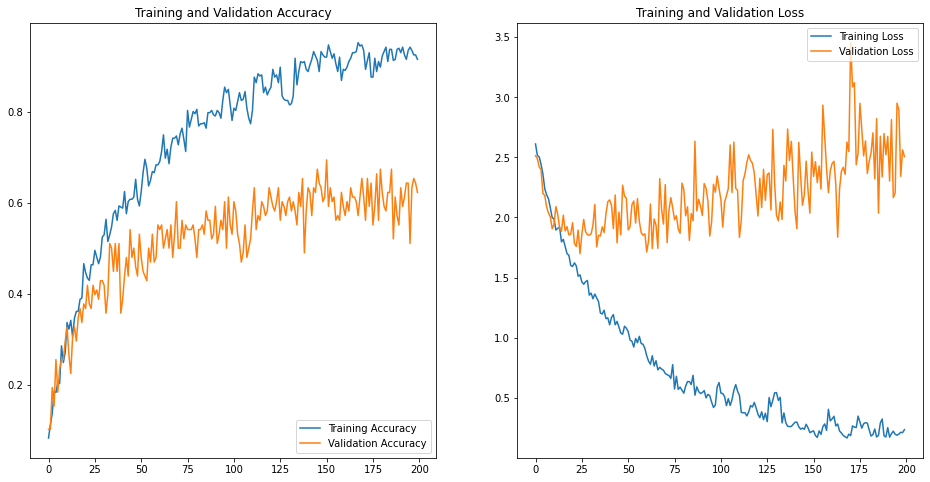

In [13]:
draw_plt(history, epoch_now,'model_ori_training')

In [21]:
from tensorflow.keras.models import load_model
from PIL import Image
import os
import pathlib
from tensorflow.keras.preprocessing import image_dataset_from_directory
# -------------------------------------------------------------------------------------------------
data_test = image_dataset_from_directory(val_dir, label_mode='categorical', image_size=(224, 224), batch_size=64)



Found 119 files belonging to 13 classes.


In [22]:
#model.compile(optimizer=optimizer_init(), loss="categorical_crossentropy", metrics=model.compile(optimizer=optimizer_init(), loss="categorical_crossentropy", metrics=['accuracy']))
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(224,224,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, (1,1), activation='relu'))
#model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(units=13, activation='relu'))
model.add(Dense(13, activation='softmax'))
model = load_model("model.h5")

model.summary()
print('Data: TEST')
print(model.evaluate(data_test, verbose=-1))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0